In [1]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#Pengambilan dataset
uc_data = pd.read_csv("used_cars.csv")
uc_data.shape

(20001, 26)

Text(0, 0.5, 'odometer')

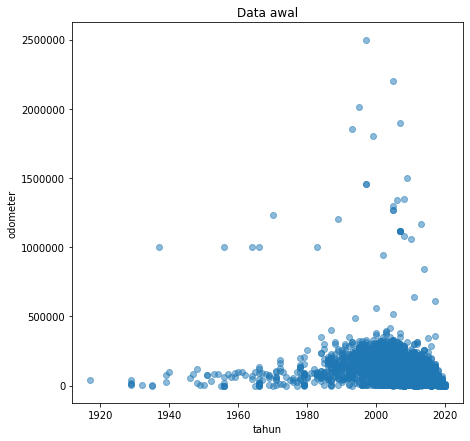

In [3]:
#Plot grap antara tahun dan odometer
fig,grap = plt.subplots(figsize=(7,7))
grap.scatter(uc_data["year"], uc_data["odometer"], alpha=0.5)
plt.title('Data awal')
plt.xlabel('tahun')
plt.ylabel('odometer')

In [4]:
#Menghilangkan missing values (0 dan NaN)
use_data = uc_data[['year','odometer']].replace(0, np.nan)
use_data.dropna(inplace=True)
use_data.shape

(17570, 2)

Text(0, 0.5, 'odometer')

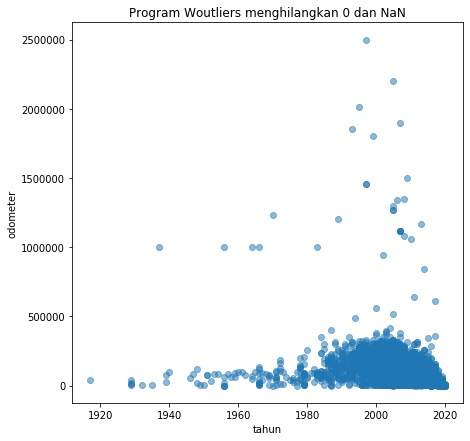

In [5]:
#Plot grap antara tahun dan odometer setelah menghilangkan 0 dan NaN
fig,grap = plt.subplots(figsize=(7,7))
grap.scatter(use_data["year"], use_data["odometer"], alpha=0.5)
plt.title('Program Woutliers menghilangkan 0 dan NaN')
plt.xlabel('tahun')
plt.ylabel('odometer')

In [6]:
#melakukan scaling normalization pada Program Woutliers
new_data = use_data
scaler = MinMaxScaler()
use_data = scaler.fit_transform(use_data)
use_data = pd.DataFrame(use_data)
use_data.head()

,0,1
0,0.922330,0.025400
1,0.961165,0.000004
2,0.951456,0.003021
3,0.961165,0.000004
4,0.980583,0.028060


Text(0, 0.5, 'odometer')

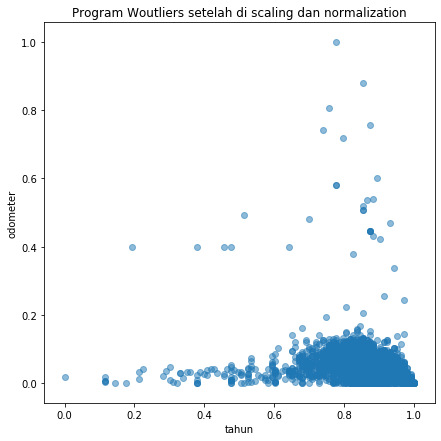

In [7]:
fig, grap = plt.subplots(figsize=(7,7))
grap.scatter(use_data[0], use_data[1], alpha=0.5)
plt.title('Program Woutliers setelah di scaling dan normalization')
plt.xlabel('tahun')
plt.ylabel('odometer')

In [8]:
#clustering membuat 4 class
#mengambil random nilai dari use_data digunakan sebagai titik class 
k = 4;
datax = use_data[0]
datay = use_data[1]
centerx = []
centery = []
for i in range(k):
    r = random.randint(0,17570)
    centerx.append(datax[r])
    centery.append(datay[r])

Text(0, 0.5, 'odometer')

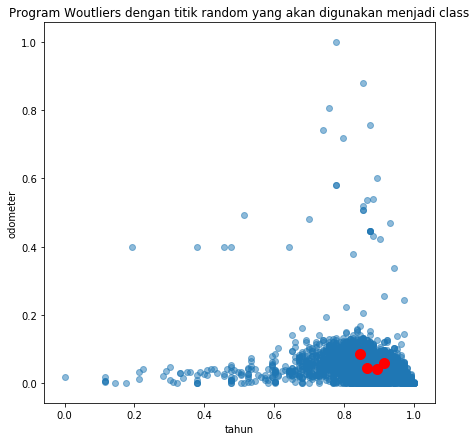

In [9]:
fig, grap = plt.subplots(figsize=(7,7))
grap.scatter(use_data[0], use_data[1], alpha=0.5)
grap.scatter(centerx,centery,s=100, c="r")
plt.title('Program Woutliers dengan titik random yang akan digunakan menjadi class')
plt.xlabel('tahun')
plt.ylabel('odometer')

In [10]:
#Mendefinisikan fungsi yang akan digunakan pada clustering
def Distance(centerx,centery,datax,datay):
    distance1 = np.sqrt(((centerx[0] - datax[i])**2) + ((centery[0] - datay[i])**2))
    distance2 = np.sqrt(((centerx[1] - datax[i])**2) + ((centery[1] - datay[i])**2))
    distance3 = np.sqrt(((centerx[2] - datax[i])**2) + ((centery[2] - datay[i])**2))
    distance4 = np.sqrt(((centerx[3] - datax[i])**2) + ((centery[3] - datay[i])**2))
    if ((distance1 < distance2) and (distance1 < distance3) and (distance1 < distance4)):
            return(0)
    elif ((distance2 < distance1) and (distance2 < distance3) and (distance2 < distance4)):
            return(1)
    elif ((distance3 < distance1) and (distance3 < distance2) and (distance3 < distance4)):
            return(2)
    elif ((distance4 < distance1) and (distance4 < distance2) and (distance4 < distance3)):
            return(3)

def Average(data,index,var):
    i = 0
    jum = 0
    pem = 0
    for i in range(len(data)):
        if (data['keterangan'][i]== index):
            jum = jum + data[var][i]
            pem = pem + 1
    return(jum/pem)

In [12]:
#Menjalankan CLustering
precenterx = [0,0,0,0]
precentery = [0,0,0,0]
while True:
    precenterx = centerx
    precentery = centery
    clustering_data = []
    for i in range(len(use_data)):
        clustering_data.append(Distance(centerx,centery,datax,datay))
    use_data['keterangan'] = clustering_data
    # clas1 = use_data[use_data['keterangan']==1]
    # clas2 = use_data[use_data['keterangan']==2]
    # clas3 = use_data[use_data['keterangan']==3]
#     print(centerx)
#     print(centery)
    centerx[0] = Average(use_data,0,0)
    centerx[1] = Average(use_data,1,0)
    centerx[2] = Average(use_data,2,0)
    centerx[3] = Average(use_data,3,0)
    centery[0] = Average(use_data,0,1)
    centery[1] = Average(use_data,1,1)
    centery[2] = Average(use_data,2,1)
    centery[3] = Average(use_data,3,1)

    if((precenterx[0] == centerx[0]) and (precenterx[1] == centerx[1]) and (precenterx[2] == centerx[2]) and (precenterx[3] == centerx[3]) and (precentery[0] == centery[0]) and (precentery[1] == centery[1]) and (precentery[2] == centery[2]) and (precentery[3] == centery[3])):
            break



,0,1,keterangan
0,0.922330,0.025400,b
1,0.961165,0.000004,y
2,0.951456,0.003021,y
3,0.961165,0.000004,y
4,0.980583,0.028060,y
5,0.893204,0.048022,b
6,0.970874,0.038193,y
7,0.873786,0.035736,g
8,0.932039,0.090412,y
9,0.922330,0.051261,b


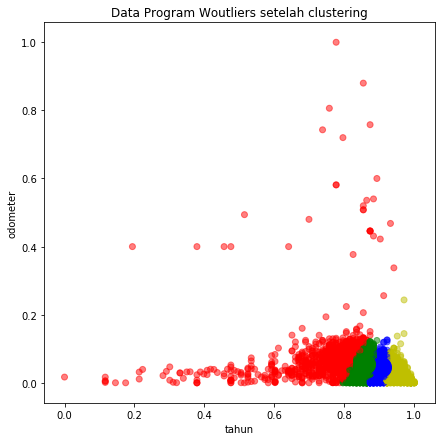

In [13]:
fig, grap = plt.subplots(figsize=(7,7))
use_data['keterangan'] = use_data['keterangan'].replace([0,1,2,3],["r","y","b","g"])
grap.scatter(use_data[0], use_data[1], color=use_data['keterangan'], alpha=0.5)
grap.scatter(centerx[0],centery[0],s=400, c="r")
grap.scatter(centerx[1],centery[1],s=400, c="y")
grap.scatter(centerx[2],centery[2],s=400, c="b")
grap.scatter(centerx[3],centery[3],s=400, c="g")
plt.title('Data Program Woutliers setelah clustering')
plt.xlabel('tahun')
plt.ylabel('odometer')
use_data.head(20)


In [14]:
#Mengisi keterangan berdasarkan data yang dihasilkan
copy_centerx = []
for i in range(len(centerx)):
    copy_centerx.append(centerx[i])
    

centerx.sort()
centerx.reverse()
for i in range(len(centerx)):
    for j in range(len(centerx)):
        if (centerx[i] == copy_centerx[j]):
            copy_centerx[j] = i

use_data['keterangan'] = use_data['keterangan'].replace(["r","y","b","g"],copy_centerx)
for_classification = use_data['keterangan']
use_data['keterangan'] = use_data['keterangan'].replace([0,1,2,3],['Sangat Direkomendasikan','Direkomendasikan','Kurang Direkomendasikan','Tidak Direkomendasikan'])
new_data['keterangan'] = use_data['keterangan']
new_data.head(20)

,year,odometer,keterangan
0,2012.0,63500.0,Direkomendasikan
1,2016.0,10.0,Sangat Direkomendasikan
2,2015.0,7554.0,Sangat Direkomendasikan
3,2016.0,10.0,Sangat Direkomendasikan
4,2018.0,70150.0,Sangat Direkomendasikan
5,2009.0,120057.0,Direkomendasikan
6,2017.0,95484.0,Sangat Direkomendasikan
7,2007.0,89340.0,Kurang Direkomendasikan
8,2013.0,226031.0,Sangat Direkomendasikan
9,2012.0,128153.0,Direkomendasikan


In [15]:
#Menyimpan dataset baru
new_data.to_csv('Woutliers_Used_car.csv')

In [16]:
#Classification
data_classification = use_data
data_classification['keterangan'] = for_classification
data_classification = data_classification[[0,1,'keterangan']].replace(np.nan)
use_data.dropna(inplace=True)

In [17]:
#Membuat data train dan test
variable = np.array(data_classification[[0,1]])
label = np.array(data_classification['keterangan'])
Variable_train, Variable_test, Label_train, Label_test = train_test_split(variable, label, test_size=0.2)

In [18]:
#Linear SVM
csvm = svm.SVC(kernel='linear')
csvm.fit(Variable_train, Label_train)
csvm_pred = csvm.predict(Variable_test)

In [19]:
#KNN
cknn = KNeighborsClassifier(n_neighbors=5) 
cknn.fit(Variable_train, Label_train)
cknn_pred = cknn.predict(Variable_test)

In [20]:
#Cek akurasi
print("Akurasi Linear SVM :",metrics.accuracy_score(Label_test,csvm_pred))
print("Akurasi KNN        :",metrics.accuracy_score(Label_test,cknn_pred))

Akurasi Linear SVM : 0.9473534433693797
Akurasi KNN        : 0.9991462720546386
